<a href="https://colab.research.google.com/github/devamsheth21/Bearing-Fault-Detection-using-Deep-Learning-approach/blob/main/Training%20and%20Testing%20SDP%20images%20using%20CNN%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install -q efficientnet

     |████████████████████████████████| 50 kB 2.7 MB/s 


In [ ]:
'''!pip install split_folders
import splitfolders
[35,2],[40,2],[30,9],[50,2],[30,7],
#ztlist = [[35,9],[35,7],[60,2],[40,7],[40,9],[60,1],[30,2]] 
ztlist =[(39, 3), (41, 6), (39, 5), (17, 2), (17, 3), (29, 4), (46, 6), (14, 4), (43, 5), (31, 4), (10, 7), (12, 3), (42, 2), (56, 8), (49, 2), (59, 3), (49, 4),(51, 4), (49, 10), (47, 8), (15, 7), (13, 4), (34, 2), (29, 3), (40, 4), (12, 8)]



for item in ztlist:

  input_folder = "/content/gdrive/MyDrive/MP(Inner-Outer)/48kpart2/" + "z=" + str(item[0])+", "+"t=" + str(item[1])
 
  output ="/content/gdrive/MyDrive/MP(I-0)split/48kpart2/" + "z=" + str(item[0])+", "+"t=" + str(item[1])
  
  splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .1, .1))

In [ ]:
#Pranav Run 1

!pip install split_folders
import splitfolders
# Merko bhulna nahi [35,2],[40,2],[30,9],[50,2],[30,7],
#ztlist = [[35,9],[35,7],[60,2],[40,7],[40,9],[60,1],[30,2]] 
ztlist =[(15, 7), (13, 4), (34, 2), (29, 3), (40, 4), (12, 8)]

for item in ztlist:

  input_folder = "/content/gdrive/MyDrive/MP(Inner-Outer)/48kpart2/" + "z=" + str(item[0])+", "+"t=" + str(item[1])
 
  output ="/content/gdrive/MyDrive/MP(I-0)split/48kpart2/" + "z=" + str(item[0])+", "+"t=" + str(item[1])
  
  splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .1, .1))

In [ ]:
'''!pip install split_folders
import splitfolders


input_folder = "/content/gdrive/MyDrive/MP(Inner-Outer)/48k part 2/z=30, t=2"
 
output ="/content/gdrive/MyDrive/MP(I-0)split/48k part 2/z=30, t=2"
  
splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .1, .1))

Copying files: 607 files [02:34,  3.94 files/s]


In [ ]:
train_dir = '/content/gdrive/MyDrive/MP(I-0)split/48kpart2/z=13, t=4 (1)/train'
val_dir   = '/content/gdrive/MyDrive/MP(I-0)split/48kpart2/z=13, t=4 (1)/val'
test_dir  = '/content/gdrive/MyDrive/MP(I-0)split/48kpart2/z=13, t=4 (1)/test'


In [ ]:
import os
train_inner_fnames = os.listdir(train_dir+'/Inner' )
train_outer_fnames = os.listdir(train_dir+'/Outer')

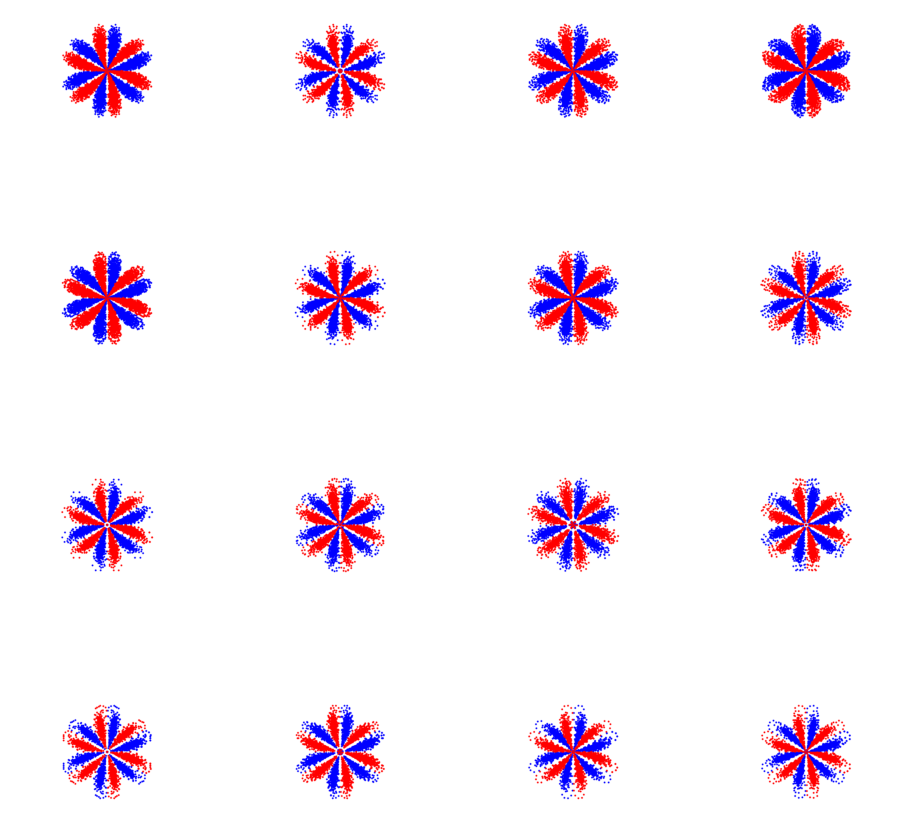

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x10 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_outer_pix = [os.path.join(train_dir+'/Outer', fname) 
                for fname in train_outer_fnames[pic_index-8:pic_index]]
next_inner_pix = [os.path.join(train_dir+'/Inner', fname) 
                for fname in train_inner_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_outer_pix+next_inner_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size=(288,432)
batch_size = 16

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,
    vertical_flip=False)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=False,
    seed=42,
    class_mode='categorical')

Found 485 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 60 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode=None)

Found 62 images belonging to 2 classes.


In [ ]:
num_classes = 2
input_shape = (288,432,3)

In [ ]:
import efficientnet.tfkeras as efn
from tensorflow.keras import models, layers, optimizers, regularizers, callbacks, metrics

base_model = efn.EfficientNetB7(input_shape=input_shape, weights='imagenet', include_top=False)
base_model.trainable = False # (transfer learning)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128)(x)
out = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs=base_model.input, outputs=out)

model.summary()

258449408/258434480 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 288, 432, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 144, 216, 64  1728        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 144, 216, 64  256         ['stem_conv[0][0]']              
                           

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=[metrics.AUC(from_logits=True)])

In [ ]:
## set Checkpoint : save best only, verbose on
#checkpoint = callbacks.ModelCheckpoint("railtrack_enetB7.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', save_freq=1)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VAL  =val_generator.n//val_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size
num_epochs = 5

In [ ]:
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,epochs=num_epochs, validation_data=val_generator, validation_steps=STEP_SIZE_VAL) #callbacks=[checkpoint])

Epoch 1/5
30/30 [==============================] - 135s 3s/step - loss: 2.1209 - accuracy: 0.5991 - val_loss: 2.1850 - val_accuracy: 0.4375
Epoch 2/5
30/30 [==============================] - 31s 1s/step - loss: 0.8408 - accuracy: 0.6674 - val_loss: 0.7273 - val_accuracy: 0.6667
Epoch 3/5
30/30 [==============================] - 31s 1s/step - loss: 0.7560 - accuracy: 0.6844 - val_loss: 0.4880 - val_accuracy: 0.8125
Epoch 4/5
30/30 [==============================] - 31s 1s/step - loss: 0.8446 - accuracy: 0.6716 - val_loss: 0.3884 - val_accuracy: 0.8333
Epoch 5/5
30/30 [==============================] - 31s 1s/step - loss: 0.5283 - accuracy: 0.7889 - val_loss: 0.7252 - val_accuracy: 0.7083


In [ ]:
#models.save_model(model, '/content/gdrive/MyDrive/Minor Project trained models/cumulative-3-1.h5')
#model.load_weights("model name here")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

predY=model.predict(test_generator) 
y_pred = np.argmax(predY,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[19 12]
 [ 1 30]]


In [ ]:
labels = ['Inner', 'Outer']
print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

       Inner       0.95      0.61      0.75        31
       Outer       0.71      0.97      0.82        31

    accuracy                           0.79        62
   macro avg       0.83      0.79      0.78        62
weighted avg       0.83      0.79      0.78        62



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


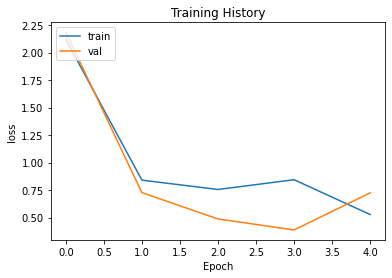

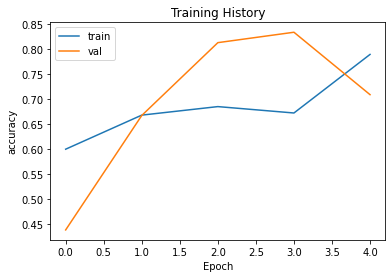

In [ ]:
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,val): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[val])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')